In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Harry\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
data = pd.read_csv("C:/Users/Harry/Desktop/tdata.csv")
data.head()
#data.shape

,comment,rating
0,To palala hasat hasat,1
1,Me padlo mala laagla,-1
2,Mala mahit aahe,0
3,Me harlo,-1
4,Me kaam karoty,0


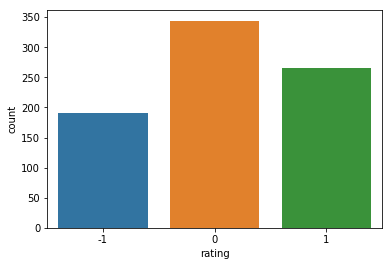

In [3]:
%matplotlib inline
import seaborn as sns
sns.countplot(x='rating', data=data)

In [4]:
dataf=pd.DataFrame(data)
dataf['comment']=dataf['comment'].str.lower()
dataf['comment']=dataf['comment'].str.replace('\W+'," ")
dataf.head()

,comment,rating
0,to palala hasat hasat,1
1,me padlo mala laagla,-1
2,mala mahit aahe,0
3,me harlo,-1
4,me kaam karoty,0


In [5]:
stop = stopwords.words('marathi')
dataf['stopwords'] = data['comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataf.head()

,comment,rating,stopwords
0,to palala hasat hasat,1,1
1,me padlo mala laagla,-1,2
2,mala mahit aahe,0,2
3,me harlo,-1,1
4,me kaam karoty,0,2


In [6]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(' '.join([word for word in review.split() if word not in stop]))
    return removed_stop_words
dataf['stop word removed comment'] = remove_stop_words(data['comment'])

dataf

,comment,rating,stopwords,stop word removed comment
0,to palala hasat hasat,1,1,palala hasat hasat
1,me padlo mala laagla,-1,2,padlo laagla
2,mala mahit aahe,0,2,mahit
3,me harlo,-1,1,harlo
4,me kaam karoty,0,2,karoty
5,me theek aahe,0,2,theek
6,aamhi jinklo,1,1,jinklo
7,aapan sagle jinklo,1,2,jinklo
8,mala call kar,0,1,call kar
9,me tula call karto,0,1,tula call karto


In [7]:
def identify_tokens(row):
    comment = row['stop word removed comment']
    tokens = nltk.word_tokenize(comment)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

dataf['tokens'] = data.apply(identify_tokens, axis=1)
dataf

,comment,rating,stopwords,stop word removed comment,tokens
0,to palala hasat hasat,1,1,palala hasat hasat,"[palala, hasat, hasat]"
1,me padlo mala laagla,-1,2,padlo laagla,"[padlo, laagla]"
2,mala mahit aahe,0,2,mahit,[mahit]
3,me harlo,-1,1,harlo,[harlo]
4,me kaam karoty,0,2,karoty,[karoty]
5,me theek aahe,0,2,theek,[theek]
6,aamhi jinklo,1,1,jinklo,[jinklo]
7,aapan sagle jinklo,1,2,jinklo,[jinklo]
8,mala call kar,0,1,call kar,"[call, kar]"
9,me tula call karto,0,1,tula call karto,"[tula, call, karto]"


In [8]:
x = dataf.iloc[:, 3].values  
y = dataf.iloc[:, 1].values

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
tfidfconverter = TfidfVectorizer(max_features=200, min_df=1, max_df=0.10)  
x = tfidfconverter.fit_transform(dataf['stop word removed comment']).toarray()

In [10]:
#Dividing the data into train and test set
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=200)

In [11]:
#Training and evaluating the text classification model
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
text_classifier.fit(x_train, y_train)
predictions = text_classifier.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
accuracy_rf = accuracy_score(y_test, predictions)*100

print('Random Forest Accuracy:', accuracy_rf)

[[20 34  8]
 [15 71 11]
 [ 3 27 51]]
              precision    recall  f1-score   support

          -1       0.53      0.32      0.40        62
           0       0.54      0.73      0.62        97
           1       0.73      0.63      0.68        81

   micro avg       0.59      0.59      0.59       240
   macro avg       0.60      0.56      0.57       240
weighted avg       0.60      0.59      0.58       240

Random Forest Accuracy: 59.166666666666664


In [13]:
from sklearn.neighbors import  KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [14]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_knn = accuracy_score(y_test, y_pred)*100
print('KNN Accuracy:', accuracy_knn)

[[ 8 48  6]
 [11 76 10]
 [ 3 48 30]]
              precision    recall  f1-score   support

          -1       0.36      0.13      0.19        62
           0       0.44      0.78      0.57        97
           1       0.65      0.37      0.47        81

   micro avg       0.47      0.47      0.48       240
   macro avg       0.49      0.43      0.41       240
weighted avg       0.49      0.47      0.44       240

KNN Accuracy: 47.5


In [15]:
from sklearn.naive_bayes import  GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [16]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_gb = accuracy_score(y_test, y_pred)*100
print('GaussianNB Accuracy:',accuracy_gb)

[[46 10  6]
 [48 30 19]
 [28 13 40]]
              precision    recall  f1-score   support

          -1       0.38      0.74      0.50        62
           0       0.57      0.31      0.40        97
           1       0.62      0.49      0.55        81

   micro avg       0.48      0.48      0.48       240
   macro avg       0.52      0.52      0.48       240
weighted avg       0.53      0.48      0.48       240

GaussianNB Accuracy: 48.333333333333336


In [17]:
from sklearn.tree import DecisionTreeClassifier
# Make a decision tree and train
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [18]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_dt = accuracy_score(y_test, y_pred)*100
print('Decision Tree:', accuracy_dt)

[[21 31 10]
 [16 66 15]
 [ 6 29 46]]
              precision    recall  f1-score   support

          -1       0.49      0.34      0.40        62
           0       0.52      0.68      0.59        97
           1       0.65      0.57      0.61        81

   micro avg       0.55      0.55      0.55       240
   macro avg       0.55      0.53      0.53       240
weighted avg       0.56      0.55      0.55       240

Decision Tree: 55.41666666666667


In [19]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [20]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_sv = accuracy_score(y_test, y_pred)*100
print('Support vector machine :', accuracy_sv)

[[ 9 49  4]
 [ 6 79 12]
 [ 1 37 43]]
              precision    recall  f1-score   support

          -1       0.56      0.15      0.23        62
           0       0.48      0.81      0.60        97
           1       0.73      0.53      0.61        81

   micro avg       0.55      0.55      0.55       240
   macro avg       0.59      0.50      0.48       240
weighted avg       0.58      0.55      0.51       240

Support vector machine : 54.58333333333333


In [21]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()   
reg.fit(x_train, y_train) 
y_pred = reg.predict(x_test) 

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [22]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_lr = accuracy_score(y_test, y_pred)*100
print('Logistic Regression :', accuracy_lr)

[[ 8 47  7]
 [ 5 82 10]
 [ 1 33 47]]
              precision    recall  f1-score   support

          -1       0.57      0.13      0.21        62
           0       0.51      0.85      0.63        97
           1       0.73      0.58      0.65        81

   micro avg       0.57      0.57      0.57       240
   macro avg       0.60      0.52      0.50       240
weighted avg       0.60      0.57      0.53       240

Logistic Regression : 57.08333333333333


In [23]:
Accuracy = [accuracy_rf,accuracy_knn,accuracy_gb,accuracy_dt,accuracy_sv,accuracy_lr]
col={'Accuracy': Accuracy}
models = ['Random forest','KNN','GaussianNB','Decision Tree','Support vector machine','Logistic Regression']
accuracy = pd.DataFrame(data=col, index=models)
accuracy

,Accuracy
Random forest,59.166667
KNN,47.500000
GaussianNB,48.333333
Decision Tree,55.416667
Support vector machine,54.583333
Logistic Regression,57.083333


In [24]:
#importing Marathi dataset
import pandas as pd
data = pd.read_csv("C:/Users/Harry/Desktop/marathi data.csv")
data.head()
#data.shape

,comment,rating
0,तो पळाला हसत हसत,1
1,मी पडलो मला लागलं,-1
2,मला माहित आहे,0
3,मी हरलो,-1
4,मी काम करतोय,0


In [25]:
import os 
from google.cloud import translate_v2

os.environ['GOOGLE_APPLICATION_CREDENTIALS']=r"C:\Users\Harry\Desktop\thesis help\TranslationAPI\cloud_key.json"

In [26]:
translate_client=translate_v2.Client()
#mdf=pd.DataFrame(data)
df=pd.DataFrame({'Marathi':data['comment']})
#op=translate_client.translate(df['Marathi'],target_language= 'en')
#op
output=df['Marathi'].apply(translate_client.translate,target_language='en')
output.head()


0    {'translatedText': 'He ran away laughing', 'de...
1    {'translatedText': 'I fell', 'detectedSourceLa...
2    {'translatedText': 'I know', 'detectedSourceLa...
3    {'translatedText': 'I lost', 'detectedSourceLa...
4    {'translatedText': 'I am working', 'detectedSo...
Name: Marathi, dtype: object

In [27]:
df['English']=output
df.head()
df.to_csv('ttext.csv')

In [28]:
mdata = pd.read_csv("C:/Users/Harry/Desktop/ttext.csv")
mdata.head()

,Marathi,English
0,तो पळाला हसत हसत,He ran away laughing
1,मी पडलो मला लागलं,I fell
2,मला माहित आहे,I know
3,मी हरलो,I lost
4,मी काम करतोय,I am working


In [29]:
mdata['English']=mdata['English'].str.lower()
mdata['English']=mdata['English'].str.replace('\W+'," ")
mdata['English']=mdata['English'].str.replace('[0-9]+', '')

mdata.head()

,Marathi,English
0,तो पळाला हसत हसत,he ran away laughing
1,मी पडलो मला लागलं,i fell
2,मला माहित आहे,i know
3,मी हरलो,i lost
4,मी काम करतोय,i am working


In [30]:
mdata['Rating']=dataf['rating']
stop = stopwords.words('english-new')
mdata['Stopwords'] = mdata['English'].apply(lambda x: len([x for x in x.split() if x in stop]))
mdata

,Marathi,English,Rating,Stopwords
0,तो पळाला हसत हसत,he ran away laughing,1,1
1,मी पडलो मला लागलं,i fell,-1,1
2,मला माहित आहे,i know,0,1
3,मी हरलो,i lost,-1,1
4,मी काम करतोय,i am working,0,2
5,मी ठीक आहे,i m fine,0,2
6,आम्ही जिंकलो,we won,1,1
7,आपण सगळे जिंकलो,we all win,1,2
8,मला कॉल कर,call me,0,1
9,मी तुला कॉल करतो,i call you,0,2


In [31]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(' '.join([word for word in review.split() if word not in stop]))
    return removed_stop_words
mdata['stop word removed comment'] = remove_stop_words(mdata['English'])

mdata

,Marathi,English,Rating,Stopwords,stop word removed comment
0,तो पळाला हसत हसत,he ran away laughing,1,1,ran away laughing
1,मी पडलो मला लागलं,i fell,-1,1,fell
2,मला माहित आहे,i know,0,1,know
3,मी हरलो,i lost,-1,1,lost
4,मी काम करतोय,i am working,0,2,working
5,मी ठीक आहे,i m fine,0,2,fine
6,आम्ही जिंकलो,we won,1,1,won
7,आपण सगळे जिंकलो,we all win,1,2,win
8,मला कॉल कर,call me,0,1,call
9,मी तुला कॉल करतो,i call you,0,2,call


In [32]:
def identify_tokens(row):
    comment = row['stop word removed comment']
    tokens = nltk.word_tokenize(comment)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

mdata['tokens'] = mdata.apply(identify_tokens, axis=1)
mdata

,Marathi,English,Rating,Stopwords,stop word removed comment,tokens
0,तो पळाला हसत हसत,he ran away laughing,1,1,ran away laughing,"[ran, away, laughing]"
1,मी पडलो मला लागलं,i fell,-1,1,fell,[fell]
2,मला माहित आहे,i know,0,1,know,[know]
3,मी हरलो,i lost,-1,1,lost,[lost]
4,मी काम करतोय,i am working,0,2,working,[working]
5,मी ठीक आहे,i m fine,0,2,fine,[fine]
6,आम्ही जिंकलो,we won,1,1,won,[won]
7,आपण सगळे जिंकलो,we all win,1,2,win,[win]
8,मला कॉल कर,call me,0,1,call,[call]
9,मी तुला कॉल करतो,i call you,0,2,call,[call]


In [33]:
x = mdata.iloc[:, 4].values  
y = mdata.iloc[:, 2].values

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
tfidfconverter = TfidfVectorizer(max_features=200, min_df=1, max_df=0.10)  
x = tfidfconverter.fit_transform(mdata['stop word removed comment']).toarray()

In [35]:
#Dividing the data into train and test set
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=200)

In [36]:
#Training and evaluating the text classification model
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
text_classifier.fit(x_train, y_train)
predictions = text_classifier.predict(x_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
accuracy_rf = accuracy_score(y_test, predictions)*100

print('Random Forest Accuracy:', accuracy_rf)

[[22 31  9]
 [10 79  8]
 [ 2 23 56]]
              precision    recall  f1-score   support

          -1       0.65      0.35      0.46        62
           0       0.59      0.81      0.69        97
           1       0.77      0.69      0.73        81

   micro avg       0.65      0.65      0.65       240
   macro avg       0.67      0.62      0.62       240
weighted avg       0.67      0.65      0.64       240

Random Forest Accuracy: 65.41666666666667


In [38]:
from sklearn.neighbors import  KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [39]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_knn = accuracy_score(y_test, y_pred)*100
print('KNN Accuracy:', accuracy_knn)

[[11 46  5]
 [ 4 91  2]
 [ 6 55 20]]
              precision    recall  f1-score   support

          -1       0.52      0.18      0.27        62
           0       0.47      0.94      0.63        97
           1       0.74      0.25      0.37        81

   micro avg       0.51      0.51      0.51       240
   macro avg       0.58      0.45      0.42       240
weighted avg       0.58      0.51      0.45       240

KNN Accuracy: 50.83333333333333


In [40]:
from sklearn.naive_bayes import  GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [41]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_gb = accuracy_score(y_test, y_pred)*100
print('GaussianNB Accuracy:',accuracy_gb)

[[43 11  8]
 [56 35  6]
 [28 15 38]]
              precision    recall  f1-score   support

          -1       0.34      0.69      0.46        62
           0       0.57      0.36      0.44        97
           1       0.73      0.47      0.57        81

   micro avg       0.48      0.48      0.48       240
   macro avg       0.55      0.51      0.49       240
weighted avg       0.57      0.48      0.49       240

GaussianNB Accuracy: 48.333333333333336


In [42]:
from sklearn.tree import DecisionTreeClassifier
# Make a decision tree and train
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [43]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_dt = accuracy_score(y_test, y_pred)*100
print('Decision Tree:', accuracy_dt)

[[22 33  7]
 [16 75  6]
 [ 5 26 50]]
              precision    recall  f1-score   support

          -1       0.51      0.35      0.42        62
           0       0.56      0.77      0.65        97
           1       0.79      0.62      0.69        81

   micro avg       0.61      0.61      0.61       240
   macro avg       0.62      0.58      0.59       240
weighted avg       0.63      0.61      0.61       240

Decision Tree: 61.25000000000001


In [44]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)

In [45]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_sv = accuracy_score(y_test, y_pred)*100
print('Support vector machine :', accuracy_sv)

[[19 37  6]
 [ 6 87  4]
 [ 1 32 48]]
              precision    recall  f1-score   support

          -1       0.73      0.31      0.43        62
           0       0.56      0.90      0.69        97
           1       0.83      0.59      0.69        81

   micro avg       0.64      0.64      0.64       240
   macro avg       0.71      0.60      0.60       240
weighted avg       0.69      0.64      0.62       240

Support vector machine : 64.16666666666667


In [46]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()   
reg.fit(x_train, y_train) 
y_pred = reg.predict(x_test) 

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
accuracy_lr = accuracy_score(y_test, y_pred)*100
print('Logistic Regression :', accuracy_lr)

[[10 46  6]
 [ 3 90  4]
 [ 2 30 49]]
              precision    recall  f1-score   support

          -1       0.67      0.16      0.26        62
           0       0.54      0.93      0.68        97
           1       0.83      0.60      0.70        81

   micro avg       0.62      0.62      0.62       240
   macro avg       0.68      0.56      0.55       240
weighted avg       0.67      0.62      0.58       240

Logistic Regression : 62.083333333333336


In [48]:
Accuracy = [accuracy_rf,accuracy_knn,accuracy_gb,accuracy_dt,accuracy_sv,accuracy_lr]
col={'Accuracy': Accuracy}
models = ['Random forest','KNN','GaussianNB','Decision Tree','Support vector machine','Logistic Regression']
df1 = pd.DataFrame(data=col, index=models)
df1

,Accuracy
Random forest,65.416667
KNN,50.833333
GaussianNB,48.333333
Decision Tree,61.250000
Support vector machine,64.166667
Logistic Regression,62.083333


In [51]:
accuracy['Accuracy after using Google Translate']=df1['Accuracy']
accuracy

,Accuracy,Accuracy after using Google Translate
Random forest,59.166667,65.416667
KNN,47.500000,50.833333
GaussianNB,48.333333,48.333333
Decision Tree,55.416667,61.250000
Support vector machine,54.583333,64.166667
Logistic Regression,57.083333,62.083333


In [50]:
accuracy.to_csv('results.csv')

In [7]:
r=pd.read_csv('results.csv')
r.head()

,Algorithm,Accuracy,Accuracy after using Google Translate,t value
0,Random forest,59.166667,65.416667,2.584527
1,KNN,47.500000,50.833333,1.334260
2,GaussianNB,48.333333,48.333333,0.000000
3,Decision Tree,55.416667,61.250000,2.370584
4,Support vector machine,54.583333,64.166667,3.921254
